In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from random import random
%matplotlib inline

In [2]:
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp #we are taking edge length to be 1 here modify 1 with edge length
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp) #or can go as (rad - coord)/velcomp
    else:
        del_t = float('inf') #float inf is stored as very big number in python
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2) #a is just another parameter
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t

In [3]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 16  # Number of disks
density = 0.05 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 
## Positions and velocities of disks.
x = np.linspace(0.1,0.9,16)
positions = np.array(list((i,i) for i in x))
velocities = np.array([(5*random(), 5*random() )for _ in range(Natoms)])
# print(velocities)

Speed_list = list() #list to store data after every event

t = 0.0 # Initial time.
n_events = 20000 # Number of collision events.dd

In [5]:
 ############### Event Loop ##############################################
for event in tqdm(range(n_events)):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)]
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    t += next_event 
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall or pair collions
        wall_index = wall_times.index(next_event)
#         print(wall_index)
        particle, component = divmod(wall_index, 2) ##)How does that even work?
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
     
    #storing the data to plot histogram afterwards
    if event>300:
        for atom in range(Natoms):
            v_list = (np.sqrt(np.dot(velocities[atom], velocities[atom]))) #A list with all speeeds
            Speed_list.append(v_list)

In [6]:
E = 0
for i in range(Natoms):
    E += 0.5*Speed_list[i]**2
E

94.57662575145403

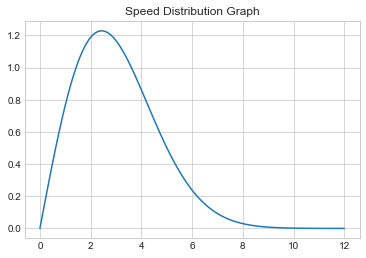

In [29]:
# plt.hist(Speed_list, bins=30, density=True);
plt.title('Speed Distribution Graph');
x = np.linspace(0,12,100)


k = Natoms/(2*E)
A = 0.25/23
#theoritical graph in 2-D
def max_boltz(v):
    return 100*v*np.exp(-k*v**2)


# y = A*max_boltz(x)
plt.plot(x,y)

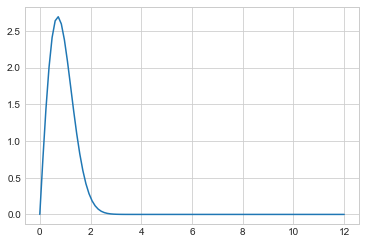

In [19]:
x = np.linspace(0,,100)

#theoritical graph in 2-D
def max_boltz(v):
    return 2*np.pi*v*np.exp(-v**2)

y = max_boltz(x)
plt.plot(x,y)

## Position Distribution

In [4]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 16  # Number of disks
density = 0.05 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 
## Positions and velocities of disks.
x = np.linspace(0.1,0.9,16)
positions = np.array(list((i,i) for i in x))
velocities = np.array([(5*random(), 5*random() )for _ in range(Natoms)])
# print(velocities)

Speed_list = list() #list to store data after every event

t = 0.0 # Initial time.
n_events = 20000 # Number of collision events.dd

t_spot = 0 #instantanious time
delta_t = 0.1 #time step
t_final = 10

n_events = 1000

position_array = list()

 ############### Event Loop ##############################################
for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)]
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    
    if event>50:
        t_previous = t
        for snapshot_time in range(int(t_previous), int(t+next_event)):
            delta_t = snapshot_time - t_previous
            p_list = list() #empty list to store only one coordinates of all atoms
            for i in range(Natoms):
                positions[i] += velocities[i]*delta_t
                p_list.append(positions[i][0])
            position_array.append(p_list)
        t += next_event 
        for i in range(Natoms):
            positions[i] += velocities[i]*(t-t_previous)
    else:
        t += next_event
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall or pair collions
        wall_index = wall_times.index(next_event)
#         print(wall_index)
        particle, component = divmod(wall_index, 2) ##)How does that even work?
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
